In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_lorenz_96
from models.clstm import cLSTM, train_model_ista, train_model_adam

In [10]:
device = torch.device('cuda')
## data
import pandas as pd
df = pd.read_csv('C:/Users/chanyoung/Desktop/TCDF-master/data/gang_csv.csv')
df =df.drop('1210030000',axis = 1)
df_ = df.loc[192:203]
df_

,1220029700,1220032100,1220033000,1220024600,1220028200,1220025300,1220029200,1220034000,1220034300,1220027500,...,1220026300,1220033400,1220025200,1220033100,1220031800,1220033300,1220031000,1220034600,1220032800,1220026800
192,31.23,29.35,30.79,29.09,15.27,28.17,28.36,29.76,34.90,25.71,...,24.36,23.00,30.86,28.66,25.50,26.98,24.60,37.71,34.10,27.53
193,30.69,31.62,33.59,21.91,16.23,30.61,31.00,26.36,37.42,29.51,...,23.24,28.29,31.12,30.12,25.22,29.92,28.35,31.22,33.10,34.57
194,29.51,30.63,28.02,24.72,16.87,30.00,27.40,25.99,31.35,25.13,...,23.30,30.98,29.20,26.99,30.59,32.97,25.05,35.74,32.05,25.56
195,30.74,32.76,28.27,21.01,15.99,25.61,30.06,32.00,33.48,26.90,...,21.00,30.19,27.26,28.65,24.11,31.57,25.54,29.66,38.06,29.03
196,29.27,36.18,37.64,26.35,15.81,25.76,29.86,24.76,38.22,24.49,...,19.00,34.26,27.92,28.12,24.40,27.18,27.46,39.45,27.66,25.80
197,33.00,35.00,29.00,20.00,17.00,20.00,25.50,27.00,20.00,22.00,...,16.00,26.00,27.00,27.00,27.50,24.00,10.60,40.00,27.00,19.00
198,29.17,30.79,28.15,21.59,15.83,24.88,29.00,27.00,34.46,27.69,...,22.59,34.01,30.20,29.08,31.11,31.61,25.97,33.27,33.23,25.64
199,28.73,36.08,32.79,20.00,15.67,25.66,30.00,31.00,38.14,27.20,...,24.76,18.00,22.29,28.29,25.00,29.73,26.08,32.15,35.85,26.43
200,28.00,32.79,33.85,19.70,20.68,22.78,32.36,23.00,39.51,29.38,...,21.84,23.00,26.08,28.57,32.57,29.42,25.92,35.87,24.55,28.64
201,29.38,23.00,28.90,23.45,15.93,25.41,30.00,43.68,29.09,29.03,...,23.76,30.00,31.82,28.45,25.00,36.00,27.44,33.31,37.00,23.88


In [11]:
df_np = df_.values
X = torch.tensor(df_np[np.newaxis], dtype=torch.float32, device=device)

In [4]:
clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)

In [5]:
train_loss_adam = train_model_ista(
    clstm, X, context=1, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 980.918335
Variable usage = 99.94%
----------Iter = 100----------
Loss = 566.714233
Variable usage = 78.12%
----------Iter = 150----------
Loss = 343.782562
Variable usage = 53.25%
----------Iter = 200----------
Loss = 227.346115
Variable usage = 44.57%
----------Iter = 250----------
Loss = 153.974823
Variable usage = 45.89%
----------Iter = 300----------
Loss = 106.161255
Variable usage = 43.80%
----------Iter = 350----------
Loss = 75.107323
Variable usage = 42.41%
----------Iter = 400----------
Loss = 54.899963
Variable usage = 41.49%
----------Iter = 450----------
Loss = 41.762550
Variable usage = 40.87%
----------Iter = 500----------
Loss = 33.191982
Variable usage = 40.66%
----------Iter = 550----------
Loss = 27.567556
Variable usage = 40.26%
----------Iter = 600----------
Loss = 23.893391
Variable usage = 40.17%
----------Iter = 650----------
Loss = 21.475620
Variable usage = 40.04%
----------Iter = 700----------
Loss = 19.874630
Variable us

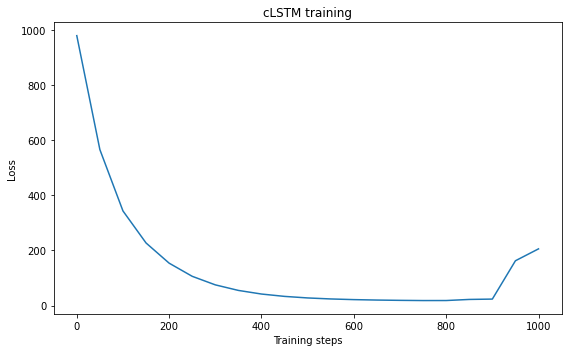

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(50 * np.arange(len(train_loss_adam)), train_loss_adam)
plt.title('cLSTM training')
plt.ylabel('Loss')
plt.xlabel('Training steps')
plt.tight_layout()
plt.show()

In [7]:
a =clstm.explainer

In [8]:
print(a)

<bound method cLSTM.explainer of cLSTM(
  (networks): ModuleList(
    (0): LSTM(
      (lstm): LSTM(57, 2, batch_first=True)
      (linear): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
    )
    (1): LSTM(
      (lstm): LSTM(57, 2, batch_first=True)
      (linear): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
    )
    (2): LSTM(
      (lstm): LSTM(57, 2, batch_first=True)
      (linear): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
    )
    (3): LSTM(
      (lstm): LSTM(57, 2, batch_first=True)
      (linear): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
    )
    (4): LSTM(
      (lstm): LSTM(57, 2, batch_first=True)
      (linear): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
    )
    (5): LSTM(
      (lstm): LSTM(57, 2, batch_first=True)
      (linear): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
    )
    (6): LSTM(
      (lstm): LSTM(57, 2, batch_first=True)
      (linear): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
    )
    (7): LSTM(
      (lstm): LSTM(57, 2, batch_first=True)


Estimated variable usage = 29.46%


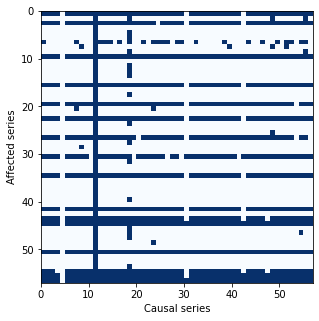

In [55]:
GC_est = clstm.GC().cpu().data.numpy()
fig, axarr = plt.subplots( figsize=(10, 5))
axarr.imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr.set_ylabel('Affected series')
axarr.set_xlabel('Causal series')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))

## time lag

In [9]:
X.shape[-1]

57

In [10]:
clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)

In [11]:
train_loss_adam = train_model_ista(
    clstm, X, context=2, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 964.713257
Variable usage = 99.94%
----------Iter = 100----------
Loss = 545.310974
Variable usage = 77.50%
----------Iter = 150----------
Loss = 315.244049
Variable usage = 54.45%
----------Iter = 200----------
Loss = 197.916718
Variable usage = 39.46%
----------Iter = 250----------
Loss = 128.091949
Variable usage = 34.38%
----------Iter = 300----------
Loss = 85.690086
Variable usage = 32.50%
----------Iter = 350----------
Loss = 59.963154
Variable usage = 31.64%
----------Iter = 400----------
Loss = 44.271996
Variable usage = 30.41%
----------Iter = 450----------
Loss = 34.698177
Variable usage = 29.73%
----------Iter = 500----------
Loss = 28.837494
Variable usage = 29.21%
----------Iter = 550----------
Loss = 25.181656
Variable usage = 28.22%
----------Iter = 600----------
Loss = 22.904430
Variable usage = 26.99%
----------Iter = 650----------
Loss = 21.473934
Variable usage = 28.47%
----------Iter = 700----------
Loss = 20.774914
Variable usa

Estimated variable usage = 34.13%
less loss =  19.472439


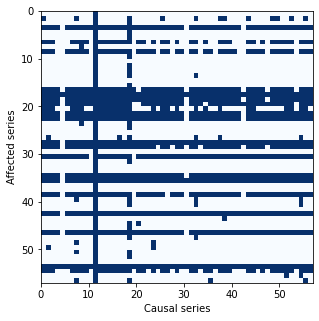

In [15]:
GC_est = clstm.GC().cpu().data.numpy()
fig, axarr = plt.subplots( figsize=(10, 5))
axarr.imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr.set_ylabel('Affected series')
axarr.set_xlabel('Causal series')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))
print('less loss = ',min(train_loss_adam).cpu().numpy())

In [20]:
GC_list = []
loss_list =[]
for i in range(11):
    clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)
    
    train_loss_adam = train_model_ista(
        clstm, X, context=i+1, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
        check_every=50)
    GC_list.append(clstm.GC().cpu().data.numpy())
    loss_list.append(train_loss_adam)
    

----------Iter = 50----------
Loss = 960.169373
Variable usage = 99.94%
----------Iter = 100----------
Loss = 544.702759
Variable usage = 79.32%
----------Iter = 150----------
Loss = 322.367798
Variable usage = 48.66%
----------Iter = 200----------
Loss = 215.081879
Variable usage = 46.72%
----------Iter = 250----------
Loss = 145.888565
Variable usage = 40.60%
----------Iter = 300----------
Loss = 100.857269
Variable usage = 38.69%
----------Iter = 350----------
Loss = 71.702347
Variable usage = 37.61%
----------Iter = 400----------
Loss = 52.674301
Variable usage = 36.69%
----------Iter = 450----------
Loss = 40.312599
Variable usage = 36.13%
----------Iter = 500----------
Loss = 32.248722
Variable usage = 35.76%
----------Iter = 550----------
Loss = 26.964144
Variable usage = 35.43%
----------Iter = 600----------
Loss = 23.497530
Variable usage = 35.27%
----------Iter = 650----------
Loss = 21.217363
Variable usage = 35.12%
----------Iter = 700----------
Loss = 19.699169
Variable us

----------Iter = 850----------
Loss = 39.276737
Variable usage = 38.81%
Stopping early
----------Iter = 50----------
Loss = 969.364258
Variable usage = 99.88%
----------Iter = 100----------
Loss = 549.244629
Variable usage = 79.69%
----------Iter = 150----------
Loss = 304.222717
Variable usage = 49.58%
----------Iter = 200----------
Loss = 178.379456
Variable usage = 42.91%
----------Iter = 250----------
Loss = 109.010223
Variable usage = 33.27%
----------Iter = 300----------
Loss = 69.898041
Variable usage = 31.79%
----------Iter = 350----------
Loss = 47.712971
Variable usage = 30.75%
----------Iter = 400----------
Loss = 35.095024
Variable usage = 29.76%
----------Iter = 450----------
Loss = 27.939526
Variable usage = 29.27%
----------Iter = 500----------
Loss = 23.830139
Variable usage = 28.90%
----------Iter = 550----------
Loss = 21.446499
Variable usage = 27.27%
----------Iter = 600----------
Loss = 20.039310
Variable usage = 25.36%
----------Iter = 650----------
Loss = 19.7797

In [29]:
len(GC_list)

11

In [30]:
np.save('GC_list.npy',GC_list)

In [35]:
np.save('loss_list.npy',loss_list)

C:\Users\chanyoung\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [39]:
len(loss_list)

11

In [41]:
loss_list_2 = []
for i in range(len(loss_list)):
    loss_list_2.append(min(loss_list[i]).cpu().numpy())

In [44]:
np.save('loss_list.npy',loss_list_2)

In [45]:
a = np.load('loss_list.npy')

In [26]:
sum(GC_list[0])

array([21, 21, 21, 19,  2, 21, 21, 21, 22, 21, 19, 56, 21, 21, 21, 21, 21,
       21, 39, 20, 21, 21, 21, 22, 20, 20, 17, 20, 21, 20,  4, 21, 23, 21,
       21, 20, 20, 21, 21, 21, 20, 19,  9, 21, 21, 20, 21, 17, 22, 21, 21,
       20, 21, 19, 23, 22, 21])

In [27]:
sum(GC_list[1])

array([20, 20, 19, 18,  0, 20, 19, 22, 20, 18, 19, 57, 20, 20, 19, 20, 20,
       18, 38, 18, 19, 19, 19, 21, 19, 19, 17, 18, 20, 20,  5, 20, 21, 18,
       19, 19, 19, 20, 21, 19, 19, 20,  7, 20, 19, 18, 20, 16, 19, 20, 19,
       19, 20, 19, 22, 23, 19])

# hidden state cell

In [12]:
clstm = cLSTM(X.shape[-1], hidden=57).cuda(device=device)
train_loss_adam = train_model_ista(
    clstm, X, context=2, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 432.774414
Variable usage = 100.00%
----------Iter = 100----------
Loss = 113.697304
Variable usage = 100.00%
----------Iter = 150----------
Loss = 39.827217
Variable usage = 89.17%
----------Iter = 200----------
Loss = 57.620617
Variable usage = 81.96%
----------Iter = 250----------
Loss = 73.780128
Variable usage = 84.89%
----------Iter = 300----------
Loss = 109.595581
Variable usage = 77.81%
----------Iter = 350----------
Loss = 84.890877
Variable usage = 80.30%
----------Iter = 400----------
Loss = 100.027222
Variable usage = 70.58%
Stopping early


In [13]:
def arrange_input(data, context):
    '''
    Arrange a single time series into overlapping short sequences.

    Args:
      data: time series of shape (T, dim).
      context: length of short sequences.
    '''
    assert context >= 1 and isinstance(context, int)
    input = torch.zeros(len(data) - context, context, data.shape[1],
                        dtype=torch.float32, device=data.device)
    target = torch.zeros(len(data) - context, context, data.shape[1],
                         dtype=torch.float32, device=data.device)
    for i in range(context):
        start = i
        end = len(data) - context + i
        input[:, i, :] = data[start:end]
        target[:, i, :] = data[start+1:end+1]
    return input.detach(), target.detach()

In [15]:
X, Y = zip(*[arrange_input(x, 2) for x in X])
X = torch.cat(X, dim=0)
Y = torch.cat(Y, dim=0)

In [102]:
df_

,1220029700,1220032100,1220033000,1220024600,1220028200,1220025300,1220029200,1220034000,1220034300,1220027500,...,1220026300,1220033400,1220025200,1220033100,1220031800,1220033300,1220031000,1220034600,1220032800,1220026800
192,31.23,29.35,30.79,29.09,15.27,28.17,28.36,29.76,34.90,25.71,...,24.36,23.00,30.86,28.66,25.50,26.98,24.60,37.71,34.10,27.53
193,30.69,31.62,33.59,21.91,16.23,30.61,31.00,26.36,37.42,29.51,...,23.24,28.29,31.12,30.12,25.22,29.92,28.35,31.22,33.10,34.57
194,29.51,30.63,28.02,24.72,16.87,30.00,27.40,25.99,31.35,25.13,...,23.30,30.98,29.20,26.99,30.59,32.97,25.05,35.74,32.05,25.56
195,30.74,32.76,28.27,21.01,15.99,25.61,30.06,32.00,33.48,26.90,...,21.00,30.19,27.26,28.65,24.11,31.57,25.54,29.66,38.06,29.03
196,29.27,36.18,37.64,26.35,15.81,25.76,29.86,24.76,38.22,24.49,...,19.00,34.26,27.92,28.12,24.40,27.18,27.46,39.45,27.66,25.80
197,33.00,35.00,29.00,20.00,17.00,20.00,25.50,27.00,20.00,22.00,...,16.00,26.00,27.00,27.00,27.50,24.00,10.60,40.00,27.00,19.00
198,29.17,30.79,28.15,21.59,15.83,24.88,29.00,27.00,34.46,27.69,...,22.59,34.01,30.20,29.08,31.11,31.61,25.97,33.27,33.23,25.64
199,28.73,36.08,32.79,20.00,15.67,25.66,30.00,31.00,38.14,27.20,...,24.76,18.00,22.29,28.29,25.00,29.73,26.08,32.15,35.85,26.43
200,28.00,32.79,33.85,19.70,20.68,22.78,32.36,23.00,39.51,29.38,...,21.84,23.00,26.08,28.57,32.57,29.42,25.92,35.87,24.55,28.64
201,29.38,23.00,28.90,23.45,15.93,25.41,30.00,43.68,29.09,29.03,...,23.76,30.00,31.82,28.45,25.00,36.00,27.44,33.31,37.00,23.88


In [18]:
print(X.shape)
X

torch.Size([10, 2, 57])


tensor([[[31.2300, 29.3500, 30.7900,  ..., 37.7100, 34.1000, 27.5300],
         [30.6900, 31.6200, 33.5900,  ..., 31.2200, 33.1000, 34.5700]],

        [[30.6900, 31.6200, 33.5900,  ..., 31.2200, 33.1000, 34.5700],
         [29.5100, 30.6300, 28.0200,  ..., 35.7400, 32.0500, 25.5600]],

        [[29.5100, 30.6300, 28.0200,  ..., 35.7400, 32.0500, 25.5600],
         [30.7400, 32.7600, 28.2700,  ..., 29.6600, 38.0600, 29.0300]],

        ...,

        [[28.7300, 36.0800, 32.7900,  ..., 32.1500, 35.8500, 26.4300],
         [28.0000, 32.7900, 33.8500,  ..., 35.8700, 24.5500, 28.6400]],

        [[28.0000, 32.7900, 33.8500,  ..., 35.8700, 24.5500, 28.6400],
         [29.3800, 23.0000, 28.9000,  ..., 33.3100, 37.0000, 23.8800]],

        [[29.3800, 23.0000, 28.9000,  ..., 33.3100, 37.0000, 23.8800],
         [31.4000, 37.3900, 31.5000,  ..., 30.2100, 28.7500, 33.3300]]],
       device='cuda:0')

In [19]:
print(Y.shape)
Y

torch.Size([10, 2, 57])


tensor([[[30.6900, 31.6200, 33.5900,  ..., 31.2200, 33.1000, 34.5700],
         [29.5100, 30.6300, 28.0200,  ..., 35.7400, 32.0500, 25.5600]],

        [[29.5100, 30.6300, 28.0200,  ..., 35.7400, 32.0500, 25.5600],
         [30.7400, 32.7600, 28.2700,  ..., 29.6600, 38.0600, 29.0300]],

        [[30.7400, 32.7600, 28.2700,  ..., 29.6600, 38.0600, 29.0300],
         [29.2700, 36.1800, 37.6400,  ..., 39.4500, 27.6600, 25.8000]],

        ...,

        [[28.0000, 32.7900, 33.8500,  ..., 35.8700, 24.5500, 28.6400],
         [29.3800, 23.0000, 28.9000,  ..., 33.3100, 37.0000, 23.8800]],

        [[29.3800, 23.0000, 28.9000,  ..., 33.3100, 37.0000, 23.8800],
         [31.4000, 37.3900, 31.5000,  ..., 30.2100, 28.7500, 33.3300]],

        [[31.4000, 37.3900, 31.5000,  ..., 30.2100, 28.7500, 33.3300],
         [29.6000, 32.2800, 28.3100,  ..., 32.9600, 37.2200, 34.1600]]],
       device='cuda:0')

In [108]:
pred, _ = clstm.networks[1](X)

In [109]:
pred[:,:,0]

tensor([[29.9134, 33.1149],
        [29.8990, 33.1044],
        [29.8818, 33.1424],
        [29.9262, 33.1212],
        [29.9082, 33.0535],
        [29.8273, 33.1203],
        [29.9021, 33.1048],
        [29.8856, 33.0300],
        [29.8111, 33.1546],
        [29.9345, 33.0819]], device='cuda:0', grad_fn=<SelectBackward>)

In [110]:
Y[:,:,1]

tensor([[31.6200, 30.6300],
        [30.6300, 32.7600],
        [32.7600, 36.1800],
        [36.1800, 35.0000],
        [35.0000, 30.7900],
        [30.7900, 36.0800],
        [36.0800, 32.7900],
        [32.7900, 23.0000],
        [23.0000, 37.3900],
        [37.3900, 32.2800]], device='cuda:0')

In [100]:
pred = clstm.networks[0](X)[1] 

In [101]:
pred

(tensor([[[ 0.7518,  0.5099, -0.7034, -0.7554, -0.6648, -0.7614, -0.7575,
            0.9160,  0.5005,  0.7184, -0.7583,  0.6650, -0.5906, -0.6428,
           -0.9078, -0.7578,  0.6799, -0.9189,  0.6231,  0.3281,  0.2823,
            0.5200,  0.7571, -0.1449, -0.7576, -0.3175, -0.7575,  0.9422,
           -0.6227,  0.7573, -0.4712,  0.3497,  0.7584,  0.7233, -0.8099,
            0.5655,  0.7196,  0.7575,  0.4714,  0.8387,  0.7572, -0.6593,
           -0.7587, -0.6883, -0.6897,  0.5040, -0.7580,  0.7329,  0.5872,
            0.6139,  0.5522,  0.6675, -0.2360, -0.7581,  0.0446,  0.7570,
            0.5475],
          [ 0.7505,  0.5053, -0.6976, -0.7544, -0.6580, -0.7565, -0.7568,
            0.9152,  0.4949,  0.7130, -0.7577,  0.6586, -0.5833, -0.6358,
           -0.9066, -0.7571,  0.6737, -0.9179,  0.6163,  0.3249,  0.2793,
            0.5122,  0.7564, -0.1442, -0.7569, -0.3150, -0.7568,  0.9412,
           -0.6162,  0.7564, -0.4657,  0.3464,  0.7577,  0.7201, -0.8054,
            0.559

In [83]:
hid = [clstm.networks[i](X)[1] for i in range(57)]

AttributeError: 'tuple' object has no attribute 'dim'

In [79]:
hid

[(tensor([[[ 0.7518,  0.5099, -0.7034, -0.7554, -0.6648, -0.7614, -0.7575,
             0.9160,  0.5005,  0.7184, -0.7583,  0.6650, -0.5906, -0.6428,
            -0.9078, -0.7578,  0.6799, -0.9189,  0.6231,  0.3281,  0.2823,
             0.5200,  0.7571, -0.1449, -0.7576, -0.3175, -0.7575,  0.9422,
            -0.6227,  0.7573, -0.4712,  0.3497,  0.7584,  0.7233, -0.8099,
             0.5655,  0.7196,  0.7575,  0.4714,  0.8387,  0.7572, -0.6593,
            -0.7587, -0.6883, -0.6897,  0.5040, -0.7580,  0.7329,  0.5872,
             0.6139,  0.5522,  0.6675, -0.2360, -0.7581,  0.0446,  0.7570,
             0.5475],
           [ 0.7505,  0.5053, -0.6976, -0.7544, -0.6580, -0.7565, -0.7568,
             0.9152,  0.4949,  0.7130, -0.7577,  0.6586, -0.5833, -0.6358,
            -0.9066, -0.7571,  0.6737, -0.9179,  0.6163,  0.3249,  0.2793,
             0.5122,  0.7564, -0.1442, -0.7569, -0.3150, -0.7568,  0.9412,
            -0.6162,  0.7564, -0.4657,  0.3464,  0.7577,  0.7201, -0.8054,
   

In [78]:
len(hid)

57

In [31]:
pred[1][:,:,0]

tensor([[29.9134, 33.1149],
        [29.8990, 33.1044],
        [29.8818, 33.1424],
        [29.9262, 33.1212],
        [29.9082, 33.0535],
        [29.8273, 33.1203],
        [29.9021, 33.1048],
        [29.8856, 33.0300],
        [29.8111, 33.1546],
        [29.9345, 33.0819]], device='cuda:0', grad_fn=<SelectBackward>)

In [95]:
len(hid[0])

2

In [96]:
torch.norm(hid[0][0][0],dim =0)

AttributeError: 'tuple' object has no attribute 'dim'

In [90]:
hid[0][0][1]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [89]:
hid_ = [torch.norm(hid[0][0][i], dim =0) for i in range(57)]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [64]:
wei = [torch.norm(clstm.networks[i].lstm.weight_ih_l0,dim =0) for i in range(57)]

In [68]:
len(wei)

57

In [74]:
wei[0]

tensor([0.0493, 0.0411, 0.0582, 0.0168, 0.0095, 0.0221, 0.0469, 0.0316, 0.0792,
        0.0240, 0.0175, 0.1244, 0.0295, 0.0277, 0.0251, 0.0654, 0.0270, 0.0247,
        0.1094, 0.0192, 0.0238, 0.0228, 0.0222, 0.0721, 0.0194, 0.0350, 0.0204,
        0.0193, 0.0782, 0.0209, 0.0115, 0.0244, 0.1028, 0.0178, 0.0353, 0.0221,
        0.0202, 0.0473, 0.0363, 0.0312, 0.0218, 0.0196, 0.0129, 0.0443, 0.0246,
        0.0215, 0.0318, 0.0168, 0.0289, 0.0351, 0.0262, 0.0279, 0.0489, 0.0204,
        0.1261, 0.0799, 0.0237], device='cuda:0', grad_fn=<CopyBackwards>)

In [69]:
wei_ = torch.stack(wei)

In [76]:
(wei_[0] >0).int()

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0', dtype=torch.int32)